In [1]:
# Making a geodataframe

# Import dependencies
import geopandas as gp
import pandas as pd

In [2]:
df = pd.read_csv('db_catastro.csv')

In [3]:
catastro_gp = gp.GeoDataFrame(df,
                             geometry = gp.points_from_xy(df.longitud, df.latitud),
                             crs=4326)

<AxesSubplot:>

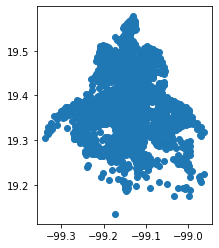

In [4]:
catastro_gp.plot()

In [5]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
import numpy as np

In [6]:
# Store the CSV you saved created in part one into a DataFrame.
catastro_df = pd.read_csv("db_catastro.csv")
catastro_df.head()

,col_name,mun_code,prom_valor_unitario_suelo,latitud,longitud,alcaldia,estado
0,19 DE MAYO,1210,1404.400000,19.361649,-99.253530,Álvaro Obregón,CDMX
1,1RA VICTORIA,1150,2061.619503,19.386686,-99.201985,Álvaro Obregón,CDMX
2,1RA VICTORIA SECCION BOSQUES,1150,1788.360000,19.387826,-99.197446,Álvaro Obregón,CDMX
3,2DA JALALPA TEPITO (AMPL),1260,1063.626266,19.375080,-99.233736,Álvaro Obregón,CDMX
4,2DA EL PIRUL (AMPL),1210,1320.710000,19.379745,-99.242231,Álvaro Obregón,CDMX


In [26]:
#change to lowers
catastro_df['col_name']=catastro_df['col_name'].str.lower()
catastro_df

,col_name,mun_code,prom_valor_unitario_suelo,latitud,longitud,alcaldia,estado
0,19 de mayo,1210,1404.400000,19.361649,-99.253530,Álvaro Obregón,CDMX
1,1ra victoria,1150,2061.619503,19.386686,-99.201985,Álvaro Obregón,CDMX
2,1ra victoria seccion bosques,1150,1788.360000,19.387826,-99.197446,Álvaro Obregón,CDMX
3,2da jalalpa tepito (ampl),1260,1063.626266,19.375080,-99.233736,Álvaro Obregón,CDMX
4,2da el pirul (ampl),1210,1320.710000,19.379745,-99.242231,Álvaro Obregón,CDMX
...,...,...,...,...,...,...,...
1784,guadalupe,16900,420.703636,19.218264,-99.120799,Xochimilco,CDMX
1785,nativitas la joya (ampl),16900,711.580672,19.237250,-99.093782,Xochimilco,CDMX
1786,san francisco tlalnepantla (pblo),16910,338.647387,19.197937,-99.122385,Xochimilco,CDMX
1787,santa cecilia tepetlapa (pblo),16880,534.238763,19.217187,-99.099325,Xochimilco,CDMX


In [8]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = catastro_df[["latitud", "longitud"]]
# Get the maximum temperature.
valor_suelo = catastro_df["prom_valor_unitario_suelo"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=valor_suelo)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [9]:
# https://github.com/DamianZAR/python_maps-layers/blob/main/Maps-layers-Python.ipynb
## import dependencies
import geopandas as gpd
import matplotlib.pyplot as plt

In [10]:
#import shape
# https://data.opendatasoft.com/explore/dataset/georef-mexico-colonia%40public/export/?disjunctive.sta_code&disjunctive.sta_name&disjunctive.mun_code&disjunctive.mun_name&disjunctive.col_code&disjunctive.col_name&location=10,19.36077,-99.14801&basemap=jawg.streets
cdmx= gpd.read_file('cdmx/georef-mexico-colonia-millesime.shp')
cdmx


,year,sta_code,sta_name,mun_code,mun_name,col_code,col_name,col_area_co,col_type,geometry
0,2019,09,Ciudad de MÃ©xico,09010,Ãlvaro ObregÃ³n,10-200,Santa Lucia,MEX,colonia,"POLYGON ((-99.25760 19.35510, -99.25754 19.355..."
1,2019,09,Ciudad de MÃ©xico,09015,CuauhtÃ©moc,15-012,Ex Hipodromo De Peralvillo,MEX,colonia,"POLYGON ((-99.14022 19.46039, -99.14005 19.460..."
2,2019,09,Ciudad de MÃ©xico,09012,Tlalpan,12-204,Zapote-Luis Donaldo Colosio (U Habs),MEX,colonia,"POLYGON ((-99.17772 19.29994, -99.17774 19.299..."
3,2019,09,Ciudad de MÃ©xico,09012,Tlalpan,12-201,Xaxalipac,MEX,colonia,"POLYGON ((-99.14485 19.18065, -99.14471 19.180..."
4,2019,09,Ciudad de MÃ©xico,09010,Ãlvaro ObregÃ³n,10-238,Villa Verdun,MEX,colonia,"POLYGON ((-99.25172 19.33917, -99.25170 19.339..."
...,...,...,...,...,...,...,...,...,...,...
1810,2019,09,Ciudad de MÃ©xico,09003,CoyoacÃ¡n,03-009,Bosques De Tetlameya,MEX,colonia,"POLYGON ((-99.15948 19.30381, -99.15938 19.303..."
1811,2019,09,Ciudad de MÃ©xico,09012,Tlalpan,12-013,Belvedere,MEX,colonia,"POLYGON ((-99.22484 19.26676, -99.22521 19.266..."
1812,2019,09,Ciudad de MÃ©xico,09002,Azcapotzalco,02-006,Arenal,MEX,colonia,"POLYGON ((-99.15186 19.46803, -99.15176 19.467..."
1813,2019,09,Ciudad de MÃ©xico,09007,Iztapalapa,07-319,Carlos Pacheco (U Hab),MEX,colonia,"POLYGON ((-99.03084 19.36307, -99.03080 19.363..."


<AxesSubplot:>

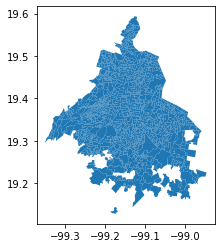

In [11]:
cdmx.plot()

In [ ]:
#import shape
# https://datos.cdmx.gob.mx/dataset/coloniascdmx
#cdmx= gpd.read_file('colonias_iecm_2019/mgpc_2019.shp')
#cdmx

In [12]:
cdmx.dtypes

year             object
sta_code         object
sta_name         object
mun_code         object
mun_name         object
col_code         object
col_name         object
col_area_co      object
col_type         object
geometry       geometry
dtype: object

In [13]:
catastro_df.dtypes

col_name                      object
mun_code                       int64
prom_valor_unitario_suelo    float64
latitud                      float64
longitud                     float64
alcaldia                      object
estado                        object
dtype: object

In [16]:
#Change data type
cdmx['mun_code'] = cdmx.mun_code.astype(int)

In [17]:
cdmx

,year,sta_code,sta_name,mun_code,mun_name,col_code,col_name,col_area_co,col_type,geometry
0,2019,09,Ciudad de MÃ©xico,9010,Ãlvaro ObregÃ³n,10-200,Santa Lucia,MEX,colonia,"POLYGON ((-99.25760 19.35510, -99.25754 19.355..."
1,2019,09,Ciudad de MÃ©xico,9015,CuauhtÃ©moc,15-012,Ex Hipodromo De Peralvillo,MEX,colonia,"POLYGON ((-99.14022 19.46039, -99.14005 19.460..."
2,2019,09,Ciudad de MÃ©xico,9012,Tlalpan,12-204,Zapote-Luis Donaldo Colosio (U Habs),MEX,colonia,"POLYGON ((-99.17772 19.29994, -99.17774 19.299..."
3,2019,09,Ciudad de MÃ©xico,9012,Tlalpan,12-201,Xaxalipac,MEX,colonia,"POLYGON ((-99.14485 19.18065, -99.14471 19.180..."
4,2019,09,Ciudad de MÃ©xico,9010,Ãlvaro ObregÃ³n,10-238,Villa Verdun,MEX,colonia,"POLYGON ((-99.25172 19.33917, -99.25170 19.339..."
...,...,...,...,...,...,...,...,...,...,...
1810,2019,09,Ciudad de MÃ©xico,9003,CoyoacÃ¡n,03-009,Bosques De Tetlameya,MEX,colonia,"POLYGON ((-99.15948 19.30381, -99.15938 19.303..."
1811,2019,09,Ciudad de MÃ©xico,9012,Tlalpan,12-013,Belvedere,MEX,colonia,"POLYGON ((-99.22484 19.26676, -99.22521 19.266..."
1812,2019,09,Ciudad de MÃ©xico,9002,Azcapotzalco,02-006,Arenal,MEX,colonia,"POLYGON ((-99.15186 19.46803, -99.15176 19.467..."
1813,2019,09,Ciudad de MÃ©xico,9007,Iztapalapa,07-319,Carlos Pacheco (U Hab),MEX,colonia,"POLYGON ((-99.03084 19.36307, -99.03080 19.363..."


In [18]:
cdmx.dtypes

year             object
sta_code         object
sta_name         object
mun_code          int32
mun_name         object
col_code         object
col_name         object
col_area_co      object
col_type         object
geometry       geometry
dtype: object

In [19]:
#drop columns from cdmx

cdmx_poly=cdmx.drop(['year', 'sta_code', 'sta_name','col_code', 'col_area_co', 'col_type'],axis = 1)

In [20]:
# view new file
cdmx_poly


,mun_code,mun_name,col_name,geometry
0,9010,Ãlvaro ObregÃ³n,Santa Lucia,"POLYGON ((-99.25760 19.35510, -99.25754 19.355..."
1,9015,CuauhtÃ©moc,Ex Hipodromo De Peralvillo,"POLYGON ((-99.14022 19.46039, -99.14005 19.460..."
2,9012,Tlalpan,Zapote-Luis Donaldo Colosio (U Habs),"POLYGON ((-99.17772 19.29994, -99.17774 19.299..."
3,9012,Tlalpan,Xaxalipac,"POLYGON ((-99.14485 19.18065, -99.14471 19.180..."
4,9010,Ãlvaro ObregÃ³n,Villa Verdun,"POLYGON ((-99.25172 19.33917, -99.25170 19.339..."
...,...,...,...,...
1810,9003,CoyoacÃ¡n,Bosques De Tetlameya,"POLYGON ((-99.15948 19.30381, -99.15938 19.303..."
1811,9012,Tlalpan,Belvedere,"POLYGON ((-99.22484 19.26676, -99.22521 19.266..."
1812,9002,Azcapotzalco,Arenal,"POLYGON ((-99.15186 19.46803, -99.15176 19.467..."
1813,9007,Iztapalapa,Carlos Pacheco (U Hab),"POLYGON ((-99.03084 19.36307, -99.03080 19.363..."


In [37]:
#change to lowers
cdmx_poly['col_name']=cdmx_poly['col_name'].str.lower()
cdmx_poly

,mun_code,mun_name,col_name,geometry
0,9010,Ãlvaro ObregÃ³n,santa lucia,"POLYGON ((-99.25760 19.35510, -99.25754 19.355..."
1,9015,CuauhtÃ©moc,ex hipodromo de peralvillo,"POLYGON ((-99.14022 19.46039, -99.14005 19.460..."
2,9012,Tlalpan,zapote-luis donaldo colosio (u habs),"POLYGON ((-99.17772 19.29994, -99.17774 19.299..."
3,9012,Tlalpan,xaxalipac,"POLYGON ((-99.14485 19.18065, -99.14471 19.180..."
4,9010,Ãlvaro ObregÃ³n,villa verdun,"POLYGON ((-99.25172 19.33917, -99.25170 19.339..."
...,...,...,...,...
1810,9003,CoyoacÃ¡n,bosques de tetlameya,"POLYGON ((-99.15948 19.30381, -99.15938 19.303..."
1811,9012,Tlalpan,belvedere,"POLYGON ((-99.22484 19.26676, -99.22521 19.266..."
1812,9002,Azcapotzalco,arenal,"POLYGON ((-99.15186 19.46803, -99.15176 19.467..."
1813,9007,Iztapalapa,carlos pacheco (u hab),"POLYGON ((-99.03084 19.36307, -99.03080 19.363..."


In [40]:
# Merge Not successful
df = pd.merge( catastro_df,cdmx_poly,how='left',left_on=['mun_code','col_name'],right_on=['mun_code','col_name'])
df

,col_name_x,mun_code,prom_valor_unitario_suelo,latitud,longitud,alcaldia,estado,mun_name,col_name_y,geometry
0,19 de mayo,1210,1404.400000,19.361649,-99.253530,Álvaro Obregón,CDMX,NaN,NaN,None
1,1ra victoria,1150,2061.619503,19.386686,-99.201985,Álvaro Obregón,CDMX,NaN,NaN,None
2,1ra victoria seccion bosques,1150,1788.360000,19.387826,-99.197446,Álvaro Obregón,CDMX,NaN,NaN,None
3,2da jalalpa tepito (ampl),1260,1063.626266,19.375080,-99.233736,Álvaro Obregón,CDMX,NaN,NaN,None
4,2da el pirul (ampl),1210,1320.710000,19.379745,-99.242231,Álvaro Obregón,CDMX,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...
1784,guadalupe,16900,420.703636,19.218264,-99.120799,Xochimilco,CDMX,NaN,NaN,None
1785,nativitas la joya (ampl),16900,711.580672,19.237250,-99.093782,Xochimilco,CDMX,NaN,NaN,None
1786,san francisco tlalnepantla (pblo),16910,338.647387,19.197937,-99.122385,Xochimilco,CDMX,NaN,NaN,None
1787,santa cecilia tepetlapa (pblo),16880,534.238763,19.217187,-99.099325,Xochimilco,CDMX,NaN,NaN,None


In [164]:
# Merge
df = pd.merge( catastro_df,cdmx_poly,how='left',on=['col_name'])
df

,col_name,mun_code_x,prom_valor_unitario_suelo,latitud,longitud,alcaldia,estado,mun_code_y,mun_name,geometry
0,19 de mayo,1210,1404.400000,19.361649,-99.253530,Álvaro Obregón,CDMX,9010.0,Ãlvaro ObregÃ³n,"POLYGON ((-99.25312 19.36428, -99.25239 19.364..."
1,1ra victoria,1150,2061.619503,19.386686,-99.201985,Álvaro Obregón,CDMX,9010.0,Ãlvaro ObregÃ³n,"POLYGON ((-99.20419 19.38585, -99.20422 19.386..."
2,1ra victoria seccion bosques,1150,1788.360000,19.387826,-99.197446,Álvaro Obregón,CDMX,9010.0,Ãlvaro ObregÃ³n,"POLYGON ((-99.19927 19.38646, -99.19944 19.386..."
3,2da jalalpa tepito (ampl),1260,1063.626266,19.375080,-99.233736,Álvaro Obregón,CDMX,9010.0,Ãlvaro ObregÃ³n,"POLYGON ((-99.23047 19.38063, -99.23046 19.380..."
4,2da el pirul (ampl),1210,1320.710000,19.379745,-99.242231,Álvaro Obregón,CDMX,9010.0,Ãlvaro ObregÃ³n,"POLYGON ((-99.24327 19.38031, -99.24191 19.380..."
...,...,...,...,...,...,...,...,...,...,...
1942,guadalupe,16900,420.703636,19.218264,-99.120799,Xochimilco,CDMX,9013.0,Xochimilco,"POLYGON ((-99.11995 19.20529, -99.12015 19.205..."
1943,nativitas la joya (ampl),16900,711.580672,19.237250,-99.093782,Xochimilco,CDMX,9013.0,Xochimilco,"POLYGON ((-99.09718 19.24208, -99.09686 19.241..."
1944,san francisco tlalnepantla (pblo),16910,338.647387,19.197937,-99.122385,Xochimilco,CDMX,9013.0,Xochimilco,"POLYGON ((-99.11995 19.20529, -99.11972 19.205..."
1945,santa cecilia tepetlapa (pblo),16880,534.238763,19.217187,-99.099325,Xochimilco,CDMX,9013.0,Xochimilco,"POLYGON ((-99.10097 19.22516, -99.10071 19.225..."


In [151]:
df.dtypes

col_name                       object
mun_code_x                      int64
prom_valor_unitario_suelo     float64
latitud                       float64
longitud                      float64
alcaldia                       object
estado                         object
mun_code_y                    float64
mun_name                       object
geometry                     geometry
dtype: object

In [154]:
#convert into a GeoDataFrame
from geopandas import GeoDataFrame

df_poly = GeoDataFrame(df)


In [155]:
#drop columns from cdmx

df_poly=df.drop(['mun_code_x', 'latitud', 'longitud','alcaldia', 'estado', 'mun_code_y', 'mun_name'],axis = 1)
df_poly

,col_name,prom_valor_unitario_suelo,geometry
0,19 de mayo,1404.400000,"POLYGON ((-99.25312 19.36428, -99.25239 19.364..."
1,1ra victoria,2061.619503,"POLYGON ((-99.20419 19.38585, -99.20422 19.386..."
2,1ra victoria seccion bosques,1788.360000,"POLYGON ((-99.19927 19.38646, -99.19944 19.386..."
3,2da jalalpa tepito (ampl),1063.626266,"POLYGON ((-99.23047 19.38063, -99.23046 19.380..."
4,2da el pirul (ampl),1320.710000,"POLYGON ((-99.24327 19.38031, -99.24191 19.380..."
...,...,...,...
1942,guadalupe,420.703636,"POLYGON ((-99.11995 19.20529, -99.12015 19.205..."
1943,nativitas la joya (ampl),711.580672,"POLYGON ((-99.09718 19.24208, -99.09686 19.241..."
1944,san francisco tlalnepantla (pblo),338.647387,"POLYGON ((-99.11995 19.20529, -99.11972 19.205..."
1945,santa cecilia tepetlapa (pblo),534.238763,"POLYGON ((-99.10097 19.22516, -99.10071 19.225..."


In [156]:
df_poly= df_poly[~df_poly['geometry'].isnull()]
df_poly

,col_name,prom_valor_unitario_suelo,geometry
0,19 de mayo,1404.400000,"POLYGON ((-99.25312 19.36428, -99.25239 19.364..."
1,1ra victoria,2061.619503,"POLYGON ((-99.20419 19.38585, -99.20422 19.386..."
2,1ra victoria seccion bosques,1788.360000,"POLYGON ((-99.19927 19.38646, -99.19944 19.386..."
3,2da jalalpa tepito (ampl),1063.626266,"POLYGON ((-99.23047 19.38063, -99.23046 19.380..."
4,2da el pirul (ampl),1320.710000,"POLYGON ((-99.24327 19.38031, -99.24191 19.380..."
...,...,...,...
1942,guadalupe,420.703636,"POLYGON ((-99.11995 19.20529, -99.12015 19.205..."
1943,nativitas la joya (ampl),711.580672,"POLYGON ((-99.09718 19.24208, -99.09686 19.241..."
1944,san francisco tlalnepantla (pblo),338.647387,"POLYGON ((-99.11995 19.20529, -99.11972 19.205..."
1945,santa cecilia tepetlapa (pblo),534.238763,"POLYGON ((-99.10097 19.22516, -99.10071 19.225..."


In [157]:
df_poly.dtypes

col_name                       object
prom_valor_unitario_suelo     float64
geometry                     geometry
dtype: object

In [158]:
df_poly['prom_valor_unitario_suelo'] = df_poly.prom_valor_unitario_suelo.astype(float)

D:\Users\raul.esqueda\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [159]:
df_poly.dtypes

col_name                       object
prom_valor_unitario_suelo     float64
geometry                     geometry
dtype: object

In [160]:
df_poly

,col_name,prom_valor_unitario_suelo,geometry
0,19 de mayo,1404.400000,"POLYGON ((-99.25312 19.36428, -99.25239 19.364..."
1,1ra victoria,2061.619503,"POLYGON ((-99.20419 19.38585, -99.20422 19.386..."
2,1ra victoria seccion bosques,1788.360000,"POLYGON ((-99.19927 19.38646, -99.19944 19.386..."
3,2da jalalpa tepito (ampl),1063.626266,"POLYGON ((-99.23047 19.38063, -99.23046 19.380..."
4,2da el pirul (ampl),1320.710000,"POLYGON ((-99.24327 19.38031, -99.24191 19.380..."
...,...,...,...
1942,guadalupe,420.703636,"POLYGON ((-99.11995 19.20529, -99.12015 19.205..."
1943,nativitas la joya (ampl),711.580672,"POLYGON ((-99.09718 19.24208, -99.09686 19.241..."
1944,san francisco tlalnepantla (pblo),338.647387,"POLYGON ((-99.11995 19.20529, -99.11972 19.205..."
1945,santa cecilia tepetlapa (pblo),534.238763,"POLYGON ((-99.10097 19.22516, -99.10071 19.225..."


AttributeError: 'Line2D' object has no property 'column'

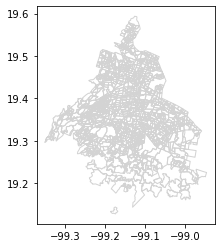

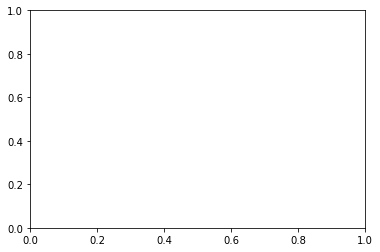

In [170]:
base= cdmx.plot(color='none', edgecolor='lightgrey')
df_poly.plot(column="prom_valor_unitario_suelo", color='blue')

In [89]:
import matplotlib.pyplot as plt


In [162]:
df_poly.set_index('prom_valor_unitario_suelo')

,col_name,geometry
prom_valor_unitario_suelo,,
1404.400000,19 de mayo,"POLYGON ((-99.25312 19.36428, -99.25239 19.364..."
2061.619503,1ra victoria,"POLYGON ((-99.20419 19.38585, -99.20422 19.386..."
1788.360000,1ra victoria seccion bosques,"POLYGON ((-99.19927 19.38646, -99.19944 19.386..."
1063.626266,2da jalalpa tepito (ampl),"POLYGON ((-99.23047 19.38063, -99.23046 19.380..."
1320.710000,2da el pirul (ampl),"POLYGON ((-99.24327 19.38031, -99.24191 19.380..."
...,...,...
420.703636,guadalupe,"POLYGON ((-99.11995 19.20529, -99.12015 19.205..."
711.580672,nativitas la joya (ampl),"POLYGON ((-99.09718 19.24208, -99.09686 19.241..."
338.647387,san francisco tlalnepantla (pblo),"POLYGON ((-99.11995 19.20529, -99.11972 19.205..."


AttributeError: 'Line2D' object has no property 'column'

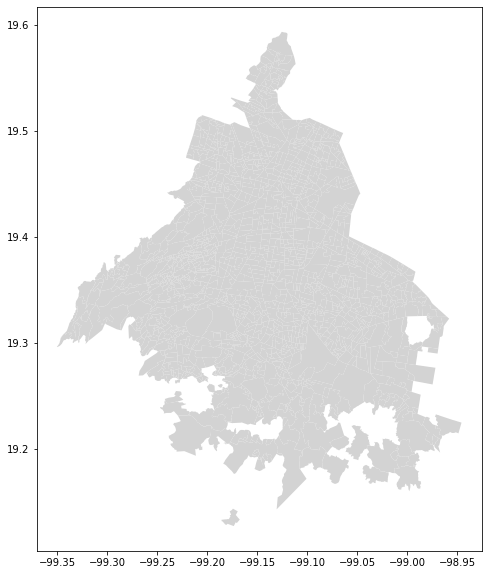

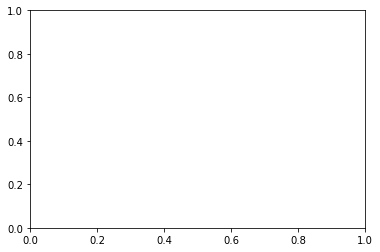

In [172]:
fig, ax = plt.subplots(figsize = (10,10))
cdmx.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
catastro_df.plot(column='prom_valor_unitario_suelo')
ax.set_title('Kings County Real Estate')

AttributeError: 'Line2D' object has no property 'column'

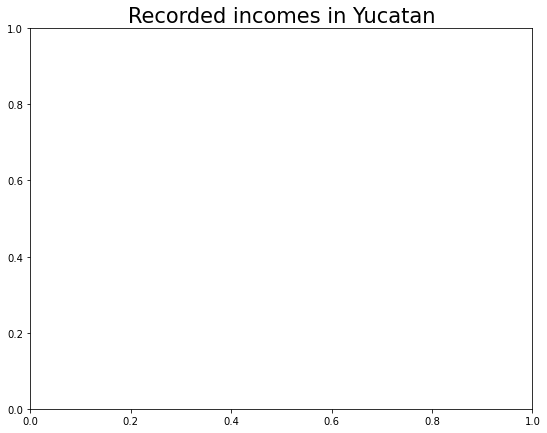

In [114]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111)

#Plot of the title
title = "Recorded incomes in Yucatan"
plt.title(title, fontsize=21)

#Map plotting
df_poly.plot(column='prom_valor_unitario_suelo',cmap = 'hot_r', ax = ax)

#Axes
ax.set_xlabel('Longitude', fontsize = 13)
ax.set_ylabel('Latitude', fontsize = 13)

#Bar features
min_s = min(df_poly['prom_valor_unitario_suelo'])
max_s = max(df_poly['prom_valor_unitario_suelo'])
bar = plt.cm.ScalarMappable(cmap='hot_r', norm=plt.Normalize(vmin = min_s , vmax=max_s))
bar._A = []
#Bar position
cax = plt.axes([0.9, 0.15, 0.03, 0.7])   #[xcoord, ycoord, width, long]
# Bar plotting
cbar = fig.colorbar(bar, cax=cax)
#Bar title
cbar.set_label('Incomes (USD)', fontsize = 12)

In [117]:
df_poly2=df_poly
df_poly2['prom_valor_unitario_suelo'] = np.log(df_poly2['prom_valor_unitario_suelo'])


AttributeError: 'Line2D' object has no property 'column'

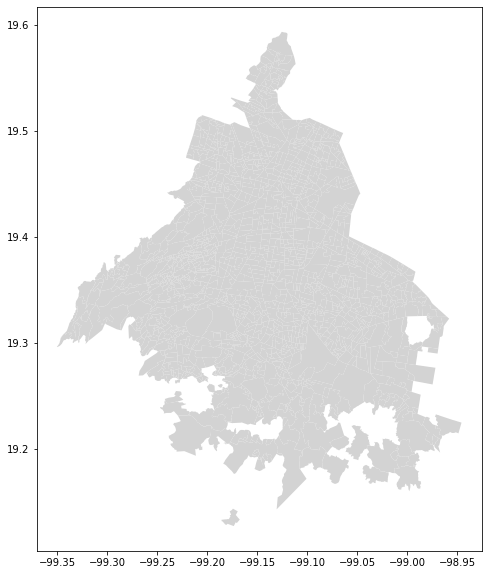

In [121]:
fig, ax = plt.subplots(figsize = (10,10))
cdmx.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
df_poly.plot(column = 'prom_valor_unitario_suelo', ax=ax, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)
ax.set_title('Kings County Price Heatmap')
plt.savefig('Heat Map')

AttributeError: 'Line2D' object has no property 'column'

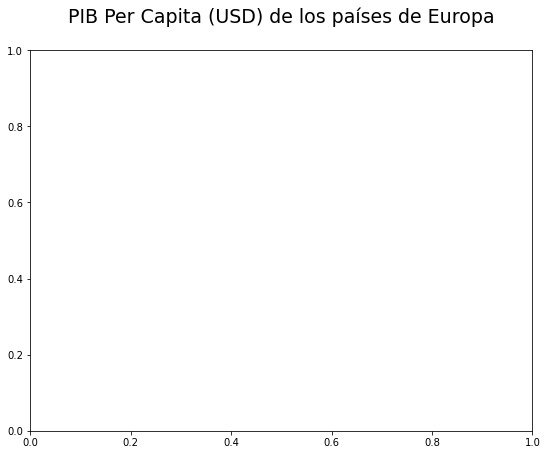

In [120]:
ig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111)
#Título del mapa
title = 'PIB Per Capita (USD) de los países de Europa'
#Impresión del título indicando un renglón entre la figura y el #texto
plt.title(title + '\n', fontsize=19)
#Impresión del mapa indicando qué marco(ax) debe tomar de referencia
df_poly.plot(column='prom_valor_unitario_suelo', cmap = 'gist_rainbow', ax = ax)
#Nombre de los ejes horizontal y vertical
ax.set_xlabel('Longitud', fontsize = 13)
ax.set_ylabel('Latitud', fontsize = 13)
#Definición de los valores mínimo y máximo como límites de la barra #a utilizar
min_p = min(df_poly['prom_valor_unitario_suelo'])
max_p = max(df_poly['prom_valor_unitario_suelo'])
#Definición de la barra gráfica
bar = plt.cm.ScalarMappable(cmap='gist_rainbow', 
 norm=plt.Normalize(vmin = min_p , vmax=max_p))
#Se declara una lista donde se guardarán los valores de la barra
bar._A = []
#Declaración de la ubicación y el tamaño de la barra.
cax = plt.axes([0.85, 0.15, 0.03, 0.7]) #[xcoord, ycoord, ancho, largo]
# Impresión de la barra con las variables superiores (bar y cax)
cbar = fig.colorbar(bar, cax=cax)
#Título de la barra
cbar.set_label('PIB Per Capita (USD)', fontsize = 12)